In [1]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('/content/cs-training.csv').drop(['Unnamed: 0'], axis = 1)
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [4]:
# rename columns
train = train.rename(columns={'NumberOfTime30-59DaysPastDueNotWorse': 'NumberOfTime30_59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse': 'NumberOfTime60_89DaysPastDueNotWorse'})


In [5]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [6]:
mylist = train.dtypes
mylist

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30_59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans         float64
NumberOfTimes90DaysLate                 float64
NumberRealEstateLoansOrLines            float64
NumberOfTime60_89DaysPastDueNotWorse    float64
NumberOfDependents                      float64
dtype: object

In [7]:
train.shape

(125113, 11)

In [8]:
train.duplicated().value_counts()

False    124670
True        443
dtype: int64

In [9]:
train_redup = train.drop_duplicates()

In [10]:
train_redup.shape

(124670, 11)

In [11]:
def findMiss(df):
    return round(df.isnull().sum() / df.shape[0] * 100 , 2)

In [12]:
findMiss(train_redup)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30_59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.60
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60_89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.57
dtype: float64

In [13]:
train_redup[train_redup.NumberOfDependents.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
count,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,0.0,3202.000000,3202.000000,3202.000000,3202.000000,0.0
mean,0.047456,13.101737,59.901342,0.601623,1110.814237,NaN,5.683948,0.524984,0.603373,0.499688,NaN
std,0.212644,263.045590,18.418692,6.702095,4585.526546,NaN,4.116325,6.699198,0.943960,6.696306,NaN
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.008431,48.000000,0.000000,24.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.047458,62.000000,0.000000,372.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.260900,74.000000,0.000000,1576.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


In [14]:
train_redup['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


In [15]:
fam_miss = train_redup[train_redup.NumberOfDependents.isnull()]
fam_nmiss = train_redup[train_redup.NumberOfDependents.notnull()]

In [16]:
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)

<ipython-input-16-eeda2eaba563>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
<ipython-input-16-eeda2eaba563>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)


In [17]:
findMiss(fam_miss)

SeriousDlqin2yrs                        0.00
RevolvingUtilizationOfUnsecuredLines    0.00
age                                     0.00
NumberOfTime30_59DaysPastDueNotWorse    0.00
DebtRatio                               0.00
MonthlyIncome                           0.00
NumberOfOpenCreditLinesAndLoans         0.03
NumberOfTimes90DaysLate                 0.03
NumberRealEstateLoansOrLines            0.03
NumberOfTime60_89DaysPastDueNotWorse    0.03
NumberOfDependents                      0.00
dtype: float64

In [18]:
fam_miss.shape

(3203, 11)

In [19]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30_59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.48
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60_89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [20]:
fam_nmiss['MonthlyIncome'].agg(['mean','median', 'min'])

mean      6685.743331
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In [21]:
fam_nmiss['MonthlyIncome'].agg(['max'])

max    3008750.0
Name: MonthlyIncome, dtype: float64

In [22]:
fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())

<ipython-input-22-55bbbc7c8038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


In [23]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30_59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60_89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [24]:
filled_train = fam_nmiss.append(fam_miss)

<ipython-input-24-f1952169a1e3>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_train = fam_nmiss.append(fam_miss)


In [25]:
findMiss(filled_train)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30_59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60_89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [26]:
filled_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [27]:
filled_train.groupby(['SeriousDlqin2yrs']).size() / filled_train.shape[0]

SeriousDlqin2yrs
0    0.933512
1    0.066488
dtype: float64

In [28]:
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    124670.000000
mean          6.071480
std         251.110111
min           0.000000
25%           0.030268
50%           0.155474
75%           0.558227
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [29]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.99])

0.99    1.093935
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [30]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.062802,3462.617978,50.400966,0.169082,491.847208,7406.908213,5.743961,0.038647,1.188406,0.091787,0.632850
std,0.243195,5112.262866,14.480942,0.553375,1190.744062,6062.188893,3.141818,0.275987,1.105266,0.596332,0.995369
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,922.500000,38.000000,0.000000,0.218640,5000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2019.000000,48.000000,0.000000,0.381491,5400.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4074.000000,60.000000,0.000000,56.000000,8785.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,6820.000000,44472.000000,21.000000,3.000000,9.000000,7.000000,4.000000


In [31]:
util_dropped = filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index)

In [32]:
util_dropped.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


<Axes: >

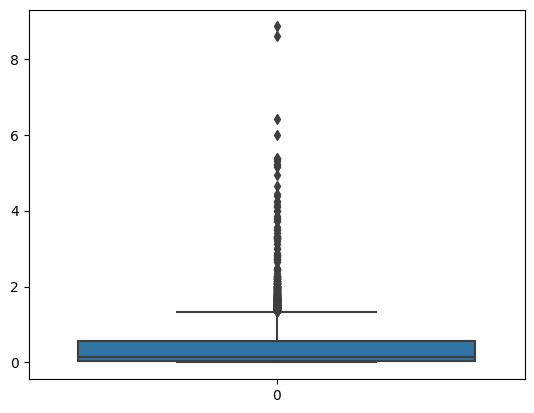

In [33]:
import seaborn as sns
sns.boxplot(util_dropped['RevolvingUtilizationOfUnsecuredLines'])

<Axes: >

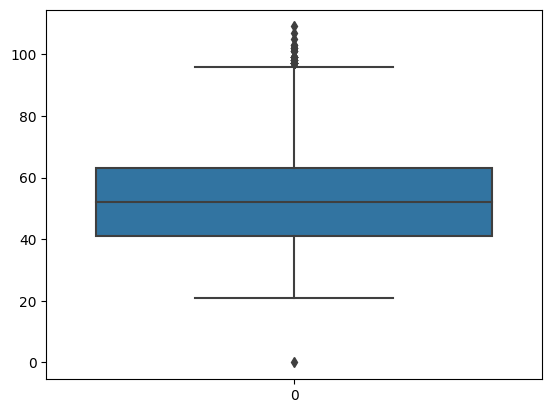

In [34]:
sns.boxplot(util_dropped['age'])

In [35]:
util_dropped.groupby(['NumberOfTime30_59DaysPastDueNotWorse']).size()

NumberOfTime30_59DaysPastDueNotWorse
0     104535
1      13381
2       3794
3       1470
4        624
5        277
6        114
7         48
8         18
9          9
10         2
12         2
13         1
96         5
98       183
dtype: int64

In [36]:
util_dropped.groupby(['NumberOfTime60_89DaysPastDueNotWorse']).size()

NumberOfTime60_89DaysPastDueNotWorse
0.0     118208
1.0       4751
2.0        919
3.0        262
4.0         79
5.0         29
6.0         15
7.0          7
8.0          2
9.0          1
11.0         1
96.0         5
98.0       183
dtype: int64

In [37]:
util_dropped.groupby(['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0.0     117509
1.0       4402
2.0       1316
3.0        552
4.0        235
5.0        117
6.0         70
7.0         25
8.0         17
9.0         15
10.0         6
11.0         5
13.0         2
14.0         1
15.0         1
17.0         1
96.0         5
98.0       183
dtype: int64

In [38]:
util_dropped[util_dropped['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0     78
1    110
dtype: int64

In [39]:
util_dropped['DebtRatio'].describe()

count    124463.000000
mean        354.703382
std        1989.924809
min           0.000000
25%           0.176954
50%           0.368463
75%           0.875296
max      329664.000000
Name: DebtRatio, dtype: float64

<Axes: xlabel='DebtRatio', ylabel='Density'>

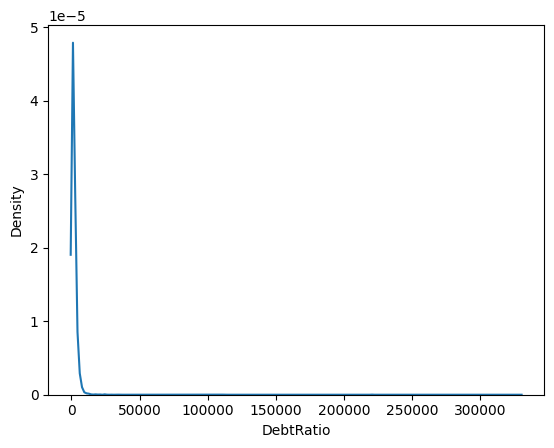

In [40]:
sns.kdeplot(util_dropped['DebtRatio'])

In [41]:
util_dropped['DebtRatio'].quantile([.975])

0.975    3500.45
Name: DebtRatio, dtype: float64

In [42]:
util_dropped[util_dropped['DebtRatio']>3500].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    2906
1     206
dtype: int64

In [43]:
util_dropped[util_dropped['DebtRatio']>3500][['SeriousDlqin2yrs', 'MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3112.000000,3112.000000
mean,0.066195,4822.175129
std,0.248663,1669.506740
min,0.000000,0.000000
25%,0.000000,5400.000000
50%,0.000000,5400.000000
75%,0.000000,5400.000000
max,1.000000,5400.000000


In [44]:
temp = util_dropped[(util_dropped['DebtRatio']>3500) & (util_dropped['SeriousDlqin2yrs']==util_dropped['MonthlyIncome'])]

In [45]:
temp.groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    303
1      2
dtype: int64

In [46]:
dRatio = util_dropped.drop(util_dropped[(util_dropped['DebtRatio'] >3500) & (util_dropped['SeriousDlqin2yrs'] == util_dropped['MonthlyIncome'])].index)

In [47]:
dRatio.shape

(124158, 11)

In [48]:
dRatio.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report






In [50]:
model = XGBClassifier(tree_method = 'exact')

In [51]:
x = dRatio.drop(['SeriousDlqin2yrs'], axis=1)
y = dRatio['SeriousDlqin2yrs']

In [53]:
model.fit(x,y.values.ravel())
y_pred = model.predict(x)


In [54]:
accuracy_score(y, y_pred)

0.948082282253258

In [55]:
cm =confusion_matrix(y,y_pred)
cm

array([[115294,    590],
       [  5856,   2418]])

In [56]:
import matplotlib.pyplot as plt

Text(50.722222222222214, 0.5, 'actuals')

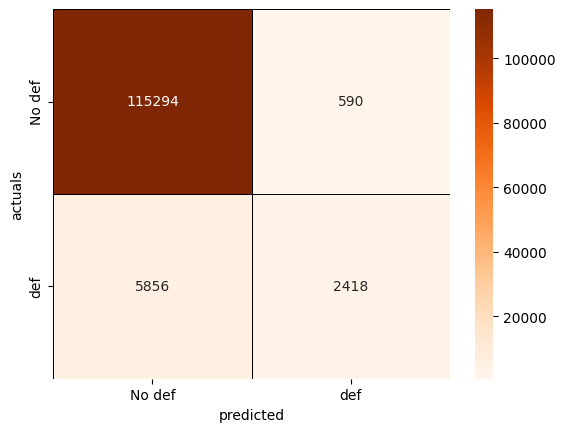

In [57]:
sns.heatmap(cm,annot=True, fmt='d', cmap='Oranges', linewidths = 0.5, linecolor ='Black')
plt.xticks(np.arange(2)+.5,['No def', 'def'])
plt.yticks(np.arange(2)+.5,['No def', 'def'])
plt.xlabel('predicted')
plt.ylabel('actuals')

In [58]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    115884
           1       0.80      0.29      0.43      8274

    accuracy                           0.95    124158
   macro avg       0.88      0.64      0.70    124158
weighted avg       0.94      0.95      0.94    124158



In [59]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [60]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [62]:
# Build a simple neural network
model_nn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [63]:
# Compile the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
# Train the model
model_nn.fit(x_train_scaled, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=2)

Epoch 1/10
621/621 - 3s - loss: 0.2029 - accuracy: 0.9362 - val_loss: nan - val_accuracy: 0.9366 - 3s/epoch - 4ms/step
Epoch 2/10
621/621 - 1s - loss: 0.1808 - accuracy: 0.9378 - val_loss: nan - val_accuracy: 0.9366 - 1s/epoch - 2ms/step
Epoch 3/10
621/621 - 1s - loss: 0.1800 - accuracy: 0.9378 - val_loss: nan - val_accuracy: 0.9370 - 1s/epoch - 2ms/step
Epoch 4/10
621/621 - 1s - loss: 0.1790 - accuracy: 0.9381 - val_loss: nan - val_accuracy: 0.9365 - 1s/epoch - 2ms/step
Epoch 5/10
621/621 - 2s - loss: 0.1787 - accuracy: 0.9380 - val_loss: nan - val_accuracy: 0.9362 - 2s/epoch - 3ms/step
Epoch 6/10
621/621 - 1s - loss: 0.1777 - accuracy: 0.9383 - val_loss: nan - val_accuracy: 0.9368 - 1s/epoch - 2ms/step
Epoch 7/10
621/621 - 1s - loss: 0.1776 - accuracy: 0.9382 - val_loss: nan - val_accuracy: 0.9365 - 1s/epoch - 2ms/step
Epoch 8/10
621/621 - 1s - loss: 0.1778 - accuracy: 0.9382 - val_loss: nan - val_accuracy: 0.9367 - 1s/epoch - 2ms/step
Epoch 9/10
621/621 - 1s - loss: 0.1771 - accurac

In [65]:
# Evaluate the model on the test set
loss, accuracy = model_nn.evaluate(x_test_scaled, y_test, verbose=0)
print(f'Neural Network - Test Accuracy: {accuracy:.4f}')

Neural Network - Test Accuracy: 0.9350


Combining XGBoost and Neural Network Predictions:

To combine the predictions from both models, you can take the average of their predicted probabilities.

In [66]:
from sklearn.exceptions import NotFittedError

In [67]:
# Train the XGBoost model
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
# Get predicted probabilities from XGBoost model
xgb_probs = model.predict_proba(x_test)[:, 1]


In [69]:
# Get predicted probabilities from Neural Network model
nn_probs = model_nn.predict(x_test_scaled)


776/776 [==============================] - 1s 1ms/step


In [70]:
# Take the average of predicted probabilities
average_probs = (xgb_probs + nn_probs.flatten()) / 2

In [71]:
# Convert to binary predictions based on a threshold (e.g., 0.5)
combined_predictions = (average_probs >= 0.5).astype(int)


In [72]:
# Evaluate the combined predictions
combined_accuracy = accuracy_score(y_test, combined_predictions)
print(f'Combined Model (Average) - Test Accuracy: {combined_accuracy:.4f}')

Combined Model (Average) - Test Accuracy: 0.9350


In [74]:
import joblib
# Save the combined model
joblib.dump(model, 'combined_model.pkl')


['combined_model.pkl']